# Contents
01 - Importing Libraries
02- Creating a crosstab of missing values
03- Considering security implications of PII data
04- Comparing customer behavior across regions
05- Excluding low-activity customers
06- Creating customer profiles & Creating a visualization for a customer profile
07- Aggregations on customer profiles
08- Analyizing customer profiles across regions and departments
09- Visualization creation

# 01 Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder location string
path = r'C:\Users\ckra9\Documents\CareerFoundry\Instacart Basket Analysis'

In [3]:
# Importing orders, products, and customer data frame
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

# 02 Creating a crosstab of missing values

In [4]:
crosstab = pd.crosstab(ords_prods_cust_merge['days_since_prior_order'], ords_prods_cust_merge['order_number'], dropna = False)

In [5]:
crosstab.to_clipboard()

# 03 Considering security implications of PII data

In [6]:
print(ords_prods_cust_merge.columns.tolist())

['user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag', 'user_prices_mean', 'spending_flag', 'median_days', 'frequency_flag']


In [7]:
ords_prods_cust_merge.drop('eval_set', axis=1, inplace=True)

# Q2
All customer related information would be considered PII data. The columns that contain PII data are 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', and 'income'. In this report, PII data is fabricated. In a real world setting this information is not to be shared and must be secure and protected.

#  04 Comparing customer behavior across regions

# Q3

In [8]:
# Creating regions based on state columns
Northeast =['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating region column
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(South), 'region'] = 'South'
ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(West), 'region'] = 'West'

In [10]:
# Check for region column
ords_prods_cust_merge.head(40)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,department_id,prices,_merge,max_order,loyalty_flag,user_prices_mean,spending_flag,median_days,frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7,9.0,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7,9.0,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7,9.0,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4,4.3,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [11]:
# Finding the mean spending flag between regions ussing crosstab function
crosstab_spending_region = pd.crosstab(ords_prods_cust_merge['spending_flag'], ords_prods_cust_merge['region'], dropna = False)

In [12]:
crosstab_spending_region.to_clipboard()

# Results
None of the regions contain more than 1% high spenders. The midwest contains 0.39% high spenders, the Northeast contains 0.33% high spenders, the South contains 0.38% high spenders, and the West contains 0.38% high spenders. The South contains both the most high spenders(40,584) and low spenders (10,751,321), meaning also the most total customers (10,791,885). Overall the spending habits across the different regions do not vary greatly. 

# 05 Excluding low-activity customers

In [13]:
# Creating normal customer activity flag
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] > 4, 'activity_flag'] = 'normal customer'

In [14]:
# Creating low-activity customer flag
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] <= 4, 'activity_flag'] = 'low-activity customer'

In [15]:
ords_prods_cust_merge['activity_flag'].value_counts(dropna = False)

activity_flag
normal customer          30964564
low-activity customer     1440295
Name: count, dtype: int64

In [16]:
# Creating dataframe without low-activity customers
active_cust_df = ords_prods_cust_merge[ords_prods_cust_merge['activity_flag'] == 'normal customer']

In [17]:
# Checking new dataframe
active_cust_df['activity_flag'].value_counts(dropna = False)

activity_flag
normal customer    30964564
Name: count, dtype: int64

In [18]:
# Exporting active customers dataframe to prepared data
active_cust_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customer_df.pkl'))

# 06 Creating customer profiles & Creating a visualization for a customer profile

In [19]:
ords_prods_cust_merge.describe()

,user_id,age,n_dependants,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,user_prices_mean,median_days
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.029372e+05,4.946527e+01,1.501896e+00,9.943773e+04,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790180e+00,3.305217e+01,7.790180e+00,1.039776e+01
std,5.946610e+04,1.848558e+01,1.118865e+00,4.305727e+04,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.242125e+00,2.515525e+01,7.348086e-01,7.131754e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.142200e+04,3.300000e+01,1.000000e+00,6.700400e+04,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.377748e+00,6.000000e+00
50%,1.026160e+05,4.900000e+01,2.000000e+00,9.661800e+04,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811250e+00,8.000000e+00
75%,1.543890e+05,6.500000e+01,3.000000e+00,1.279120e+05,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.228655e+00,1.300000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01


# Creating income brackets

I will be using the quartiles of annual income as the income brackets. Low-income will be considered 67,000 or less. Mid-income will be considered between 67,000 - 127,000. Finally high income will be considered above 127,000.

In [20]:
# Creating low-income bracket
ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] < 67000, 'income_bracket'] = 'Low income customer'

In [21]:
# Creating mid-income bracket
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income'] >= 67000) & (ords_prods_cust_merge['income'] < 127000), 'income_bracket'] = 'mid income customer'

In [22]:
# Creating high-income bracket
ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] >= 127000, 'income_bracket'] = 'High income customer'

In [23]:
ords_prods_cust_merge['income_bracket'].value_counts(dropna = False)

income_bracket
mid income customer     16035018
High income customer     8269042
Low income customer      8100799
Name: count, dtype: int64

# Creating age brackets

In [24]:
# Creating young adult age bracket
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age'] >= 18) & (ords_prods_cust_merge['age'] < 40), 'age_bracket'] = 'Young adult'

In [25]:
# Creating middle-aged age bracket
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age'] >= 40) & (ords_prods_cust_merge['age'] < 65), 'age_bracket'] = 'Middle-aged adult'

In [26]:
# Creating old adults age bracket
ords_prods_cust_merge.loc[ords_prods_cust_merge['age'] >= 65, 'age_bracket'] = 'Old adult'

In [27]:
ords_prods_cust_merge['age_bracket'].value_counts(dropna = False)

age_bracket
Middle-aged adult    12665583
Young adult          11164192
Old adult             8575084
Name: count, dtype: int64

# Creating parent/non-parent status flags

In [28]:
# Creating non-parent status flags
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants'] < 1, 'parental_status'] = 'Non-parent'

In [29]:
# Creating parent status flags
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants'] > 0, 'parental_status'] = 'Parent'

In [30]:
ords_prods_cust_merge['parental_status'].value_counts(dropna = False)

parental_status
Parent        24307356
Non-parent     8097503
Name: count, dtype: int64

# Creating combo flags for profiles

In [31]:
# Creating young parent
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Parent') & (ords_prods_cust_merge['age_bracket'] == 'Young adult'), 'age_parental'] = 'Young Parent'

In [32]:
# Creating middle-aged parent
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Parent') & (ords_prods_cust_merge['age_bracket'] == 'Middle-aged adult'), 'age_parental'] = 'Middle-aged Parent'

In [33]:
# Creating old parent
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Parent') & (ords_prods_cust_merge['age_bracket'] == 'Old adult'), 'age_parental'] = 'Old Parent'

In [34]:
# Creating young single
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Non-parent') & (ords_prods_cust_merge['age_bracket'] == 'Young adult'), 'age_parental'] = 'Young single'

In [35]:
# Creating middle-aged single
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Non-parent') & (ords_prods_cust_merge['age_bracket'] == 'Middle-aged adult'), 'age_parental'] = 'Middle-aged single'

In [36]:
# Creating old single
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Non-parent') & (ords_prods_cust_merge['age_bracket'] == 'Old adult'), 'age_parental'] = 'Old single'

In [37]:
# Creating low-income single
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Non-parent') & (ords_prods_cust_merge['income_bracket'] == 'Low income customer'), 'income_parental'] = 'Low-income single'

In [38]:
# Creating middle-income single
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Non-parent') & (ords_prods_cust_merge['income_bracket'] == 'mid income customer'), 'income_parental'] = 'Middle-income single'

In [39]:
# Creating high-income single
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Non-parent') & (ords_prods_cust_merge['income_bracket'] == 'High income customer'), 'income_parental'] = 'High-income single'

In [40]:
# Creating low-income parent
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Parent') & (ords_prods_cust_merge['income_bracket'] == 'Low income customer'), 'income_parental'] = 'Low-income parent'

In [41]:
# Creating middle-income parent
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Parent') & (ords_prods_cust_merge['income_bracket'] == 'mid income customer'), 'income_parental'] = 'Middle-income parent'

In [42]:
# Creating high-income parent
ords_prods_cust_merge.loc[(ords_prods_cust_merge['parental_status'] == 'Parent') & (ords_prods_cust_merge['income_bracket'] == 'High income customer'), 'income_parental'] = 'High-income parent'

In [43]:
ords_prods_cust_merge['age_parental'].value_counts(dropna = False)

age_parental
Middle-aged Parent    9469994
Young Parent          8382362
Old Parent            6455000
Middle-aged single    3195589
Young single          2781830
Old single            2120084
Name: count, dtype: int64

In [44]:
ords_prods_cust_merge['income_parental'].value_counts(dropna = False)

income_parental
Middle-income parent    12040104
High-income parent       6188294
Low-income parent        6078958
Middle-income single     3994914
High-income single       2080748
Low-income single        2021841
Name: count, dtype: int64

In [45]:
# Creating high income parent subset
high_income_parent_df = ords_prods_cust_merge[ords_prods_cust_merge['income_parental'] == 'High-income parent']

In [46]:
high_income_parent_df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,spending_flag,median_days,frequency_flag,region,activity_flag,income_bracket,age_bracket,parental_status,age_parental,income_parental
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,normal customer,High income customer,Middle-aged adult,Parent,Middle-aged Parent,High-income parent
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,normal customer,High income customer,Middle-aged adult,Parent,Middle-aged Parent,High-income parent
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,normal customer,High income customer,Middle-aged adult,Parent,Middle-aged Parent,High-income parent
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,normal customer,High income customer,Middle-aged adult,Parent,Middle-aged Parent,High-income parent
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,normal customer,High income customer,Middle-aged adult,Parent,Middle-aged Parent,High-income parent


In [47]:
high_income_parent_df['income_parental'].value_counts(dropna = False)

income_parental
High-income parent    6188294
Name: count, dtype: int64

# Creating Visualization for a data profile

In [48]:
# Importing data dictionary
departments_df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [49]:
departments_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [50]:
high_income_parent_df['department_id'].value_counts(dropna = False)

department_id
4     1827574
16    1049171
7      492965
19     477175
1      434477
13     366536
3      232305
15     215460
20     200613
9      171865
12     148694
17     142179
14     130563
11      85452
18      83392
6       52409
5       31932
8       19113
21      13392
2        6997
10       6030
Name: count, dtype: int64

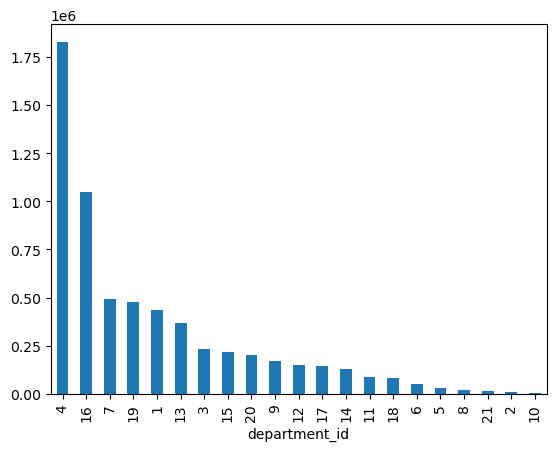

In [51]:
# Creating bar chart for high income parents
bar_high_income_parent = high_income_parent_df['department_id'].value_counts().plot.bar()

In [52]:
# Exporting bar chart
bar_high_income_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_income_parent.png'))

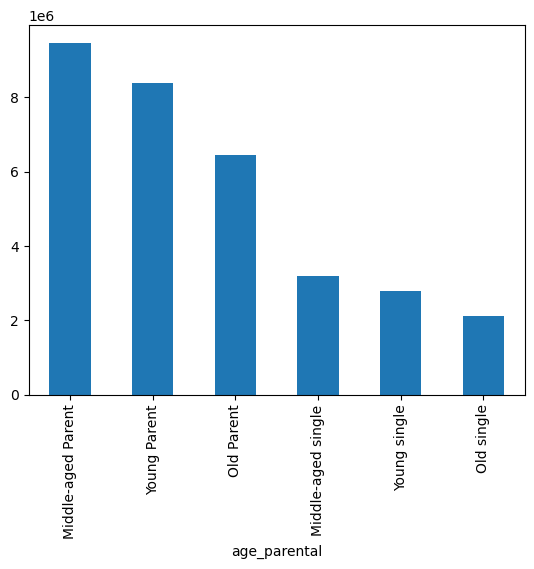

In [53]:
# Creating a bar chart showing the distribution of customer profiles (age and parental status)
bar_profile_distribution_age_parental = ords_prods_cust_merge['age_parental'].value_counts().plot.bar()

In [54]:
# Exporting bar chart
bar_profile_distribution_age_parental.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dist_age_parental.png'))

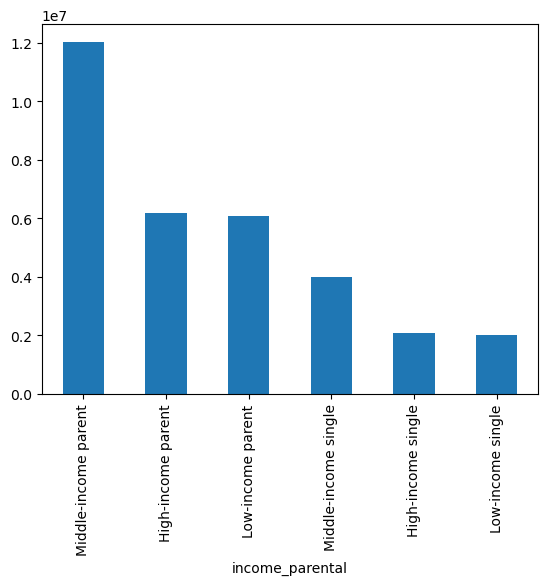

In [55]:
# Creating bar chart showing the distribution of customer profiles (income and parental status)
bar_profile_dist_income_parental = ords_prods_cust_merge['income_parental'].value_counts().plot.bar()

In [56]:
# Exporting bar chart
bar_profile_dist_income_parental.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dist_income_parent.png'))

# 07 Creating aggregations on customer profile

In [57]:
# Aggregations for high income parents for usage frequency and expenditure
high_income_parent_agg = high_income_parent_df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max'], 'prices' : ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

In [58]:
high_income_parent_agg

order_number             prices             \
                      mean min max       mean  min   max   
department_id                                              
1                15.586215   1  99   7.836358  1.0  15.0   
2                17.352437   1  99   7.401529  1.1  15.0   
3                17.471596   1  99   7.913256  1.0  15.0   
4                17.816164   1  99   8.087747  1.0  15.0   
5                15.143367   1  99   8.387094  1.0  15.0   
6                16.192200   1  99   7.748513  1.0  15.0   
7                17.494881   1  99   7.913262  1.0  15.0   
8                15.406844   1  99   8.073338  1.0  15.0   
9                15.971431   1  99   7.404054  1.0  15.0   
10               19.125041   1  99   8.590713  2.7  14.1   
11               16.270409   1  99   8.053542  1.0  15.0   
12               15.929405   1  99  16.406236  8.0  25.0   
13               16.544429   1  99   8.067867  1.0  20.0   
14               16.794007   1  99   8.179827  1.0  14.9   
15               16.108280   1  99   7.598202  1.0  15.0   
16               17.654063   1  99   8.448855  1.0  15.0   
17               15.889963   1  99   7.510796  1.0  15.0   
18               19.516368   1  99   7.694782  1.0  15.0   
19               16.980760   1  99   4.301607  1.6   7.0   
20               16.565502   1  99   7.905990  1.0  15.0   
21               22.624552   1  99   8.739225  1.0  15.0   

              days_since_prior_order             
                                mean  min   max  
department_id                                    
1                          11.621594  0.0  30.0  
2                          10.781388  0.0  30.0  
3                          10.948773  0.0  30.0  
4                          10.846919  0.0  30.0  
5                          10.237709  0.0  30.0  
6                          11.360866  0.0  30.0  
7                          10.903765  0.0  30.0  
8                          11.667190  0.0  30.0  
9                          11.664631  0.0  30.0  
10                         10.230649  0.0  30.0  
11                         11.428069  0.0  30.0  
12                         11.364173  0.0  30.0  
13                         11.114998  0.0  30.0  
14                         11.205868  0.0  30.0  
15                         11.575108  0.0  30.0  
16                         10.977074  0.0  30.0  
17                         11.807080  0.0  30.0  
18                          9.813351  0.0  30.0  
19                         10.949204  0.0  30.0  
20                         11.302939  0.0  30.0  
21                         10.150633  0.0  30.0

In [59]:
# General aggregations on high income parents
high_income_parent_df.describe()

,user_id,age,n_dependants,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,user_prices_mean,median_days
count,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,5.798073e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188294e+06,6.188289e+06
mean,1.028725e+05,6.043771e+01,2.006367e+00,1.539319e+05,1.708605e+06,1.716919e+01,2.741281e+00,1.345852e+01,1.105501e+01,2.561547e+04,8.484303e+00,5.831234e-01,7.149864e+01,9.817608e+00,7.958370e+00,3.308028e+01,7.958370e+00,1.030338e+01
std,5.928795e+04,1.250603e+01,8.167614e-01,3.559886e+04,9.881299e+05,1.754226e+01,2.103070e+00,4.248286e+00,8.750122e+00,1.407732e+04,7.113869e+00,4.930421e-01,3.807934e+01,6.237879e+00,4.265741e+00,2.514371e+01,5.767357e-01,7.042271e+00
min,9.000000e+00,1.800000e+01,1.000000e+00,1.270000e+05,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.501098e+00,0.000000e+00
25%,5.202000e+04,5.000000e+01,1.000000e+00,1.381190e+05,8.519830e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.362900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.400000e+00,1.300000e+01,7.546732e+00,6.000000e+00
50%,1.022840e+05,6.100000e+01,2.000000e+00,1.494310e+05,1.706956e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.534000e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,7.700000e+00,2.600000e+01,7.903876e+00,8.000000e+00
75%,1.538660e+05,7.100000e+01,3.000000e+00,1.606790e+05,2.565836e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.140000e+01,4.700000e+01,8.290909e+00,1.300000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,3.421069e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.210000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01


In [60]:
# Exporting aggregations for high income parents
high_income_parent_agg.to_csv(os.path.join(path, '02 Data','Prepared Data', 'high_income_parent_agg.csv'))

# 08 Analyzing customer profiles across regions and departments

In [61]:
# Analyzing age and parental status groups across regions
age_parental_region = pd.crosstab(ords_prods_cust_merge['age_parental'], ords_prods_cust_merge['region'], dropna = False)

In [62]:
age_parental_region

region,Midwest,Northeast,South,West
age_parental,,,,
Middle-aged Parent,2235903,1679558,3115454,2439079
Middle-aged single,769449,529921,1064431,831788
Old Parent,1498082,1158056,2145202,1653660
Old single,492762,395847,691055,540420
Young Parent,1958140,1466821,2829570,2127831
Young single,642989,492533,946173,700135


In [63]:
# Analyzing income and parental status across regions
income_parental_region = pd.crosstab(ords_prods_cust_merge['income_parental'], ords_prods_cust_merge['region'], dropna = False)

In [64]:
income_parental_region

region,Midwest,Northeast,South,West
income_parental,,,,
High-income parent,1477211,1107878,2027562,1575643
High-income single,495993,364392,689119,531244
Low-income parent,1425201,1065232,2031360,1557165
Low-income single,450833,363863,684789,522356
Middle-income parent,2789713,2131325,4031304,3087762
Middle-income single,958374,690046,1327751,1018743


# 09 Visualization Creation

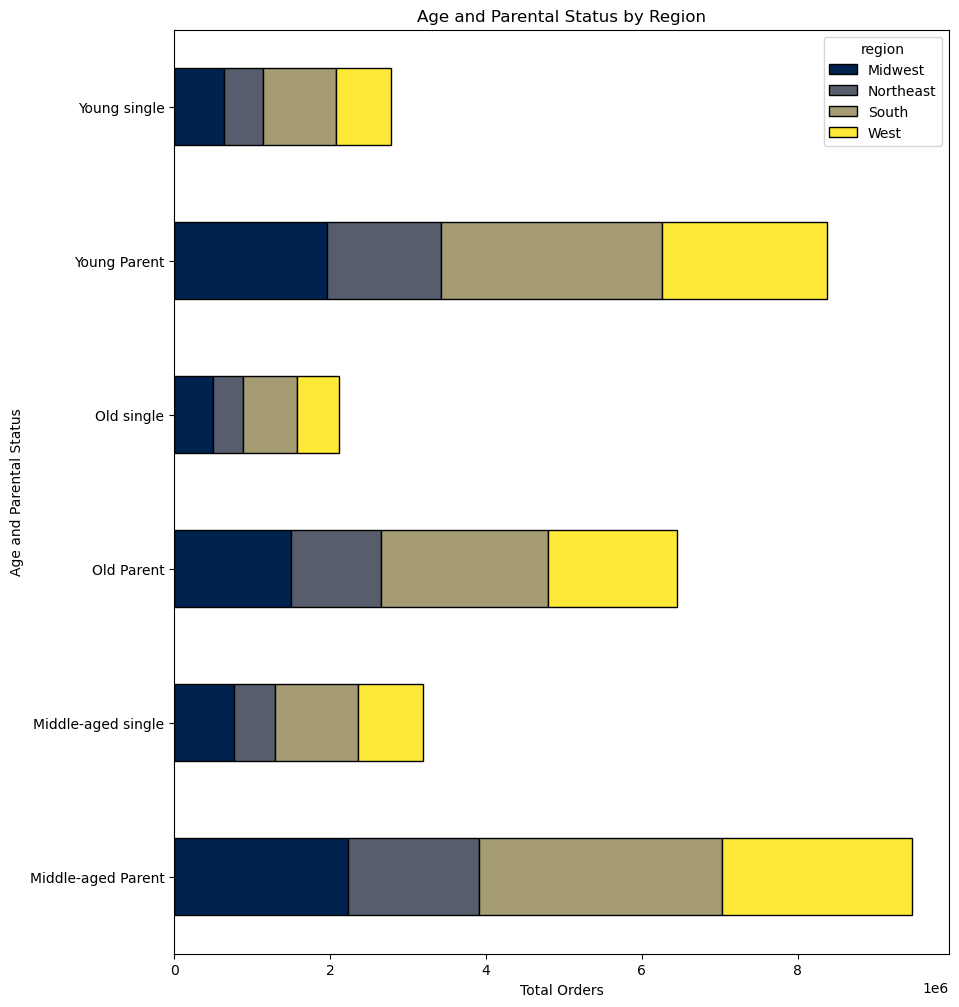

In [65]:
# Creating bar chart for age and parental status groups across regions
age_parental_region_bar = age_parental_region.plot(kind='barh', stacked = True, colormap='cividis', edgecolor='black', figsize=(10,12)),
plt.title('Age and Parental Status by Region'),
plt.xlabel('Total Orders'),
plt.ylabel('Age and Parental Status')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_parental_region_bar.png'))

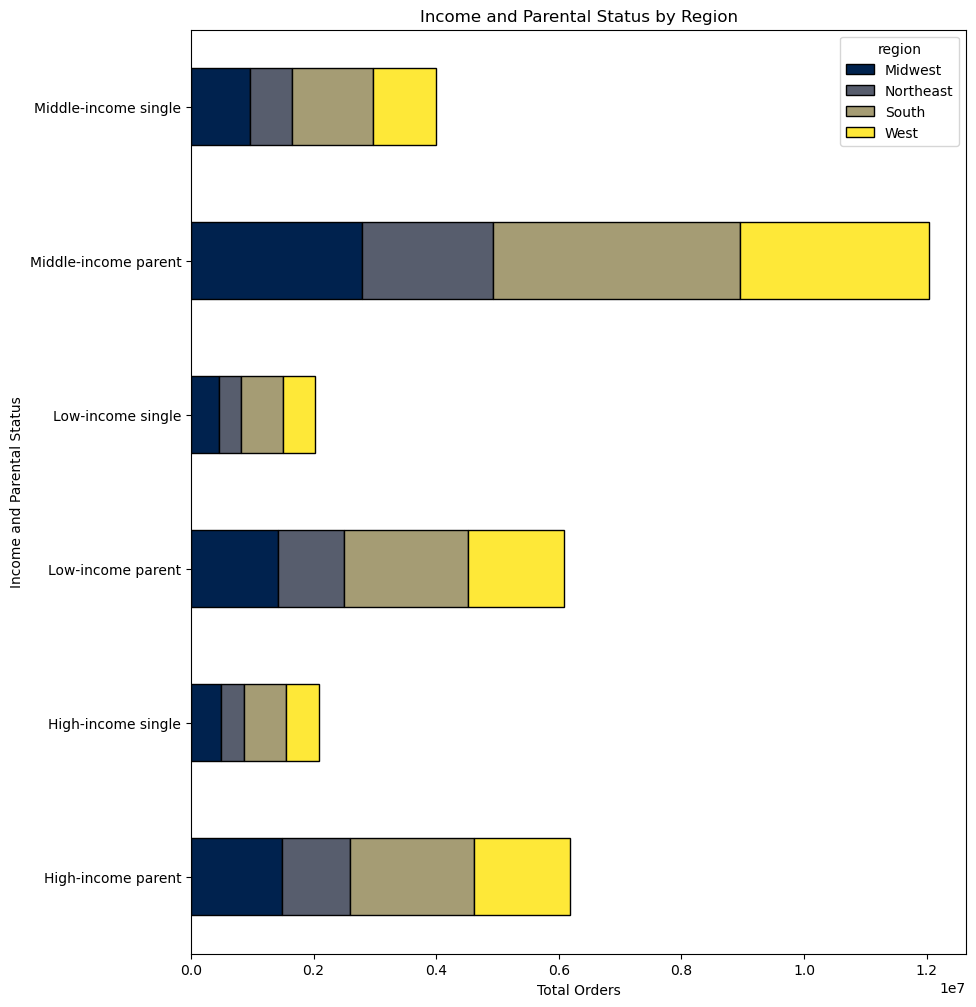

In [66]:
# Creating bar chart for income and parental status across regions
income_parental_region_bar = income_parental_region.plot(kind='barh', stacked = True, colormap='cividis', edgecolor='black', figsize=(10,12)),
plt.title('Income and Parental Status by Region'),
plt.xlabel('Total Orders'),
plt.ylabel('Income and Parental Status')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_parental_region_bar.png'))

In [67]:
# Analyzing age and parental status across departments
age_parental_department = pd.crosstab(ords_prods_cust_merge['age_parental'], ords_prods_cust_merge['department_id'], dropna = False)

In [68]:
age_parental_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_parental,,,,,,,,,,,,,,,,,,,,,
Middle-aged Parent,654374,10520,341729,2762141,43876,78379,792838,28816,253643,10098,...,207887,549439,205777,312145,1571542,218803,125724,842182,305885,20366
Middle-aged single,220975,3636,116957,935957,15895,26659,266293,9122,84971,3231,...,68424,184711,70170,104237,530914,70361,42260,284797,105746,6621
Old Parent,445336,7134,233501,1890738,29272,53280,538405,19262,172632,7078,...,143558,374873,139142,213770,1072464,149290,82764,572027,209118,13789
Old single,148333,2291,76021,623025,9764,17494,176427,7024,56303,2164,...,46556,122106,44702,68668,353749,47645,26681,188488,68500,4305
Young Parent,577873,9462,302793,2450967,41430,69881,682438,25055,225090,9119,...,183398,484300,183537,277305,1405379,189800,108820,752543,271101,17902
Young single,187852,3248,101427,816463,13459,23560,231722,8437,73988,2883,...,59104,159940,59705,91933,464699,62767,37553,247513,90899,6162


In [69]:
# Analyzing income and parental status across departments
income_parental_department = pd.crosstab(ords_prods_cust_merge['income_parental'], ords_prods_cust_merge['department_id'], dropna = False)

In [70]:
income_parental_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_parental,,,,,,,,,,,,,,,,,,,,,
High-income parent,434477,6997,232305,1827574,31932,52409,492965,19113,171865,6030,...,148694,366536,130563,215460,1049171,142179,83392,477175,200613,13392
High-income single,146074,2351,77439,617484,11539,17835,166754,7425,56834,1923,...,47477,123666,43207,70156,350686,47806,28396,162805,67753,4356
Low-income parent,406481,6661,208205,1659081,29696,45687,582581,17301,142853,7450,...,100852,329913,148407,176587,959089,146253,65553,754687,194072,12686
Low-income single,133283,2404,68956,554623,10051,15229,193930,5599,47470,2238,...,32564,109856,48125,59090,321227,48287,20861,248636,65714,4385
Middle-income parent,836625,13458,437513,3617191,52950,103444,938135,36719,336647,12815,...,285297,712163,249486,411173,2041125,269461,168363,934890,391419,25979
Middle-income single,277803,4420,148010,1203338,17528,34649,313758,11559,110958,4117,...,94043,233235,83245,135592,677449,84680,57237,309357,131678,8347


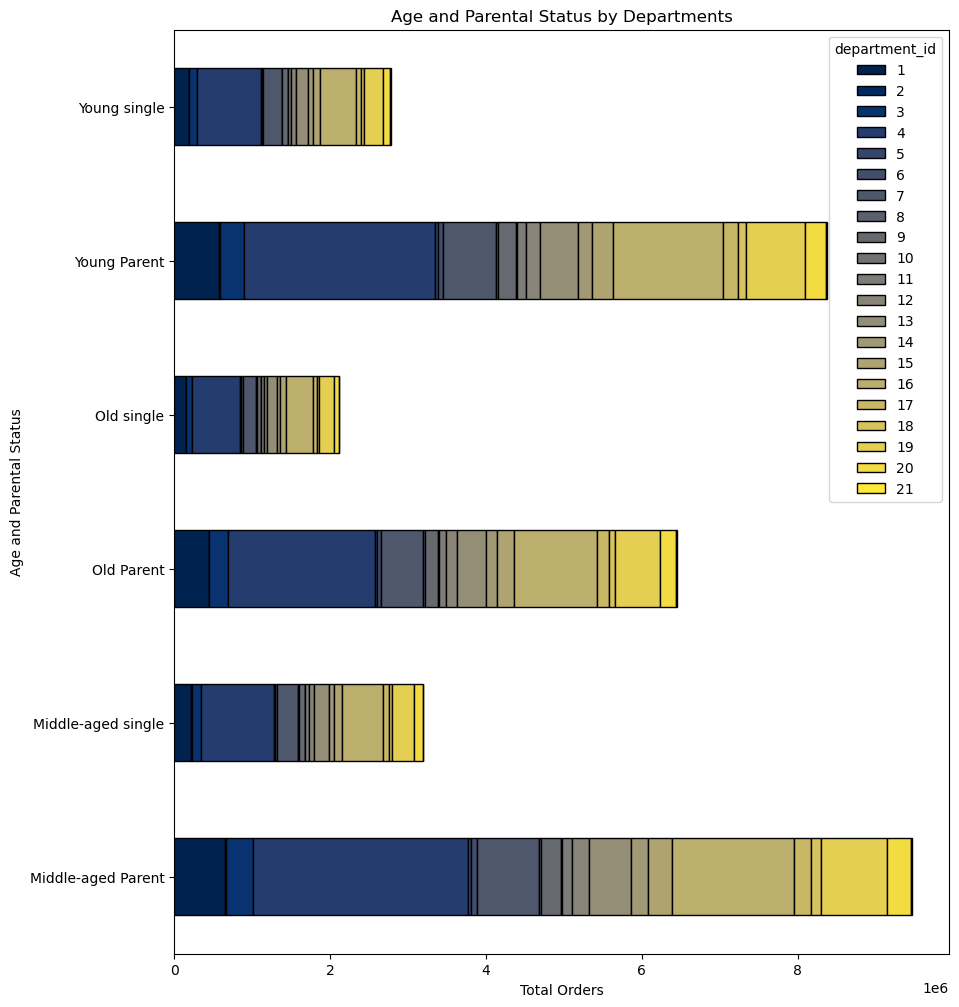

In [71]:
# Creating bar graph for age and parental status across departments
age_parental_department_bar = age_parental_department.plot(kind='barh', stacked = True, colormap='cividis', edgecolor='black', figsize=(10,12)),
plt.title('Age and Parental Status by Departments'),
plt.xlabel('Total Orders'),
plt.ylabel('Age and Parental Status')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_parental_department_bar.png'))

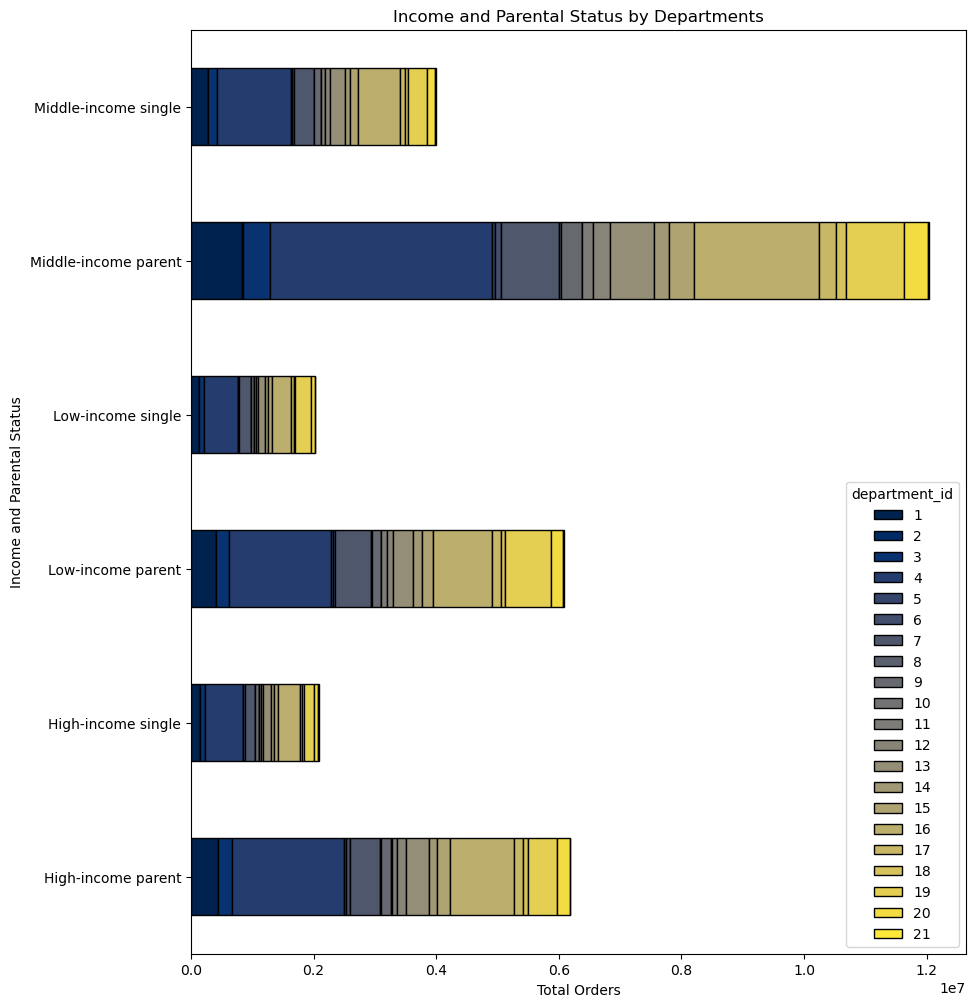

In [82]:
# Creating bar graph for income and parental status across departments
income_parental_department_bar = income_parental_department.plot(kind='barh', stacked = True, colormap='cividis', edgecolor='black', figsize=(10,12)),
plt.title('Income and Parental Status by Departments'),
plt.xlabel('Total Orders'),
plt.ylabel('Income and Parental Status')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_parental_department_bar.png'))

In [83]:
# Exporting age and parental status across regions
age_parental_region.to_csv(os.path.join(path, '02 Data','Prepared Data', 'age_parental_region.csv'))

In [84]:
# Exporting income and parental status across regions
income_parental_region.to_csv(os.path.join(path, '02 Data','Prepared Data', 'income_parental_region.csv'))

In [85]:
# Exporting age and parental status across departments
age_parental_department.to_csv(os.path.join(path, '02 Data','Prepared Data', 'age_parental_department.csv'))

In [86]:
# Exporting income and parental status across regions
income_parental_department.to_csv(os.path.join(path, '02 Data','Prepared Data', 'income_parental_department.csv'))

I do not see large differences amongst the customer profiles of different regions and departments. It seems that geographic region is a smaller driver for what items a customer buys versus the customer's parental, age, and economic status. 

In [87]:
print(ords_prods_cust_merge.columns.tolist())

['user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag', 'user_prices_mean', 'spending_flag', 'median_days', 'frequency_flag', 'region', 'activity_flag', 'income_bracket', 'age_bracket', 'parental_status', 'age_parental', 'income_parental']


In [88]:
ords_prods_cust_merge.shape

(32404859, 36)

In [89]:
# Exporting final dataset
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_instacart.pkl'))